In [98]:
import os, shutil

import random
import numpy as np
import pandas as pd
#Librarirs for Data visulization 
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D,Dropout ,MaxPooling2D,BatchNormalization
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import  EarlyStopping
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [109]:
import zipfile

In [11]:
zip_file_path = "D:/datasets/pneumonia project/archive.zip"

extract_path = "D:/datasets/pneumonia project/extracted_data"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
os.getcwd()

'C:\\Users\\fadys'

In [3]:
os.chdir('D:\\datasets\\pneumonia project\\extracted_data')

In [4]:
labels = ['PNEUMONIA','NORMAL']
img_size = 128
def get_data(data_dir):
    data = []
    labels_data = []  
    for label in labels:
        
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append(resized_arr)  
                labels_data.append(class_num)  
            except Exception as e:
                print(e)
    
  
    data = np.array(data)  
    labels_data = np.array(labels_data)  
    return data, labels_data 

In [5]:
train_data, train_labels= get_data("chest_xray/chest_xray/train")
test_data,test_labels = get_data("chest_xray/chest_xray/test")
val_data,val_label = get_data("chest_xray/chest_xray/val")

In [6]:
train_data.shape

(5216, 128, 128)

In [7]:
test_data.shape

(624, 128, 128)

In [8]:
val_data.shape

(16, 128, 128)

In [9]:
pneumonia = os.listdir("chest_xray/train/PNEUMONIA")
penomina_dir = "chest_xray/train/PNEUMONIA"

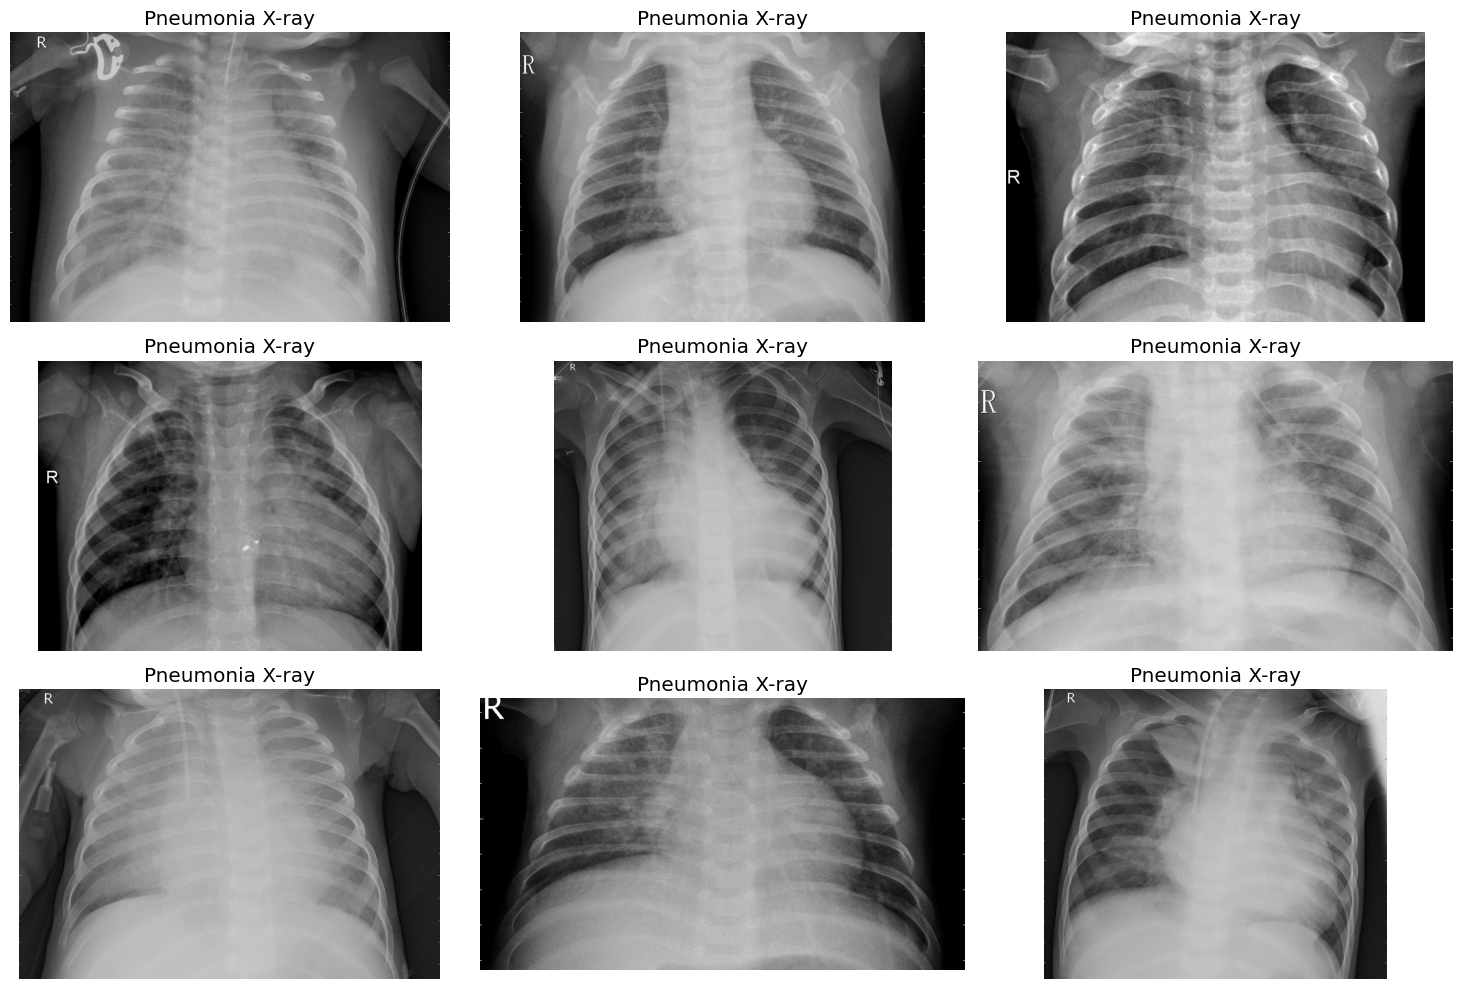

In [10]:
plt.figure(figsize=(15,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(penomina_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Pneumonia X-ray")
plt.tight_layout()

In [11]:
normal = os.listdir("chest_xray/train/NORMAL")
normal_dir = "chest_xray/train/NORMAL"

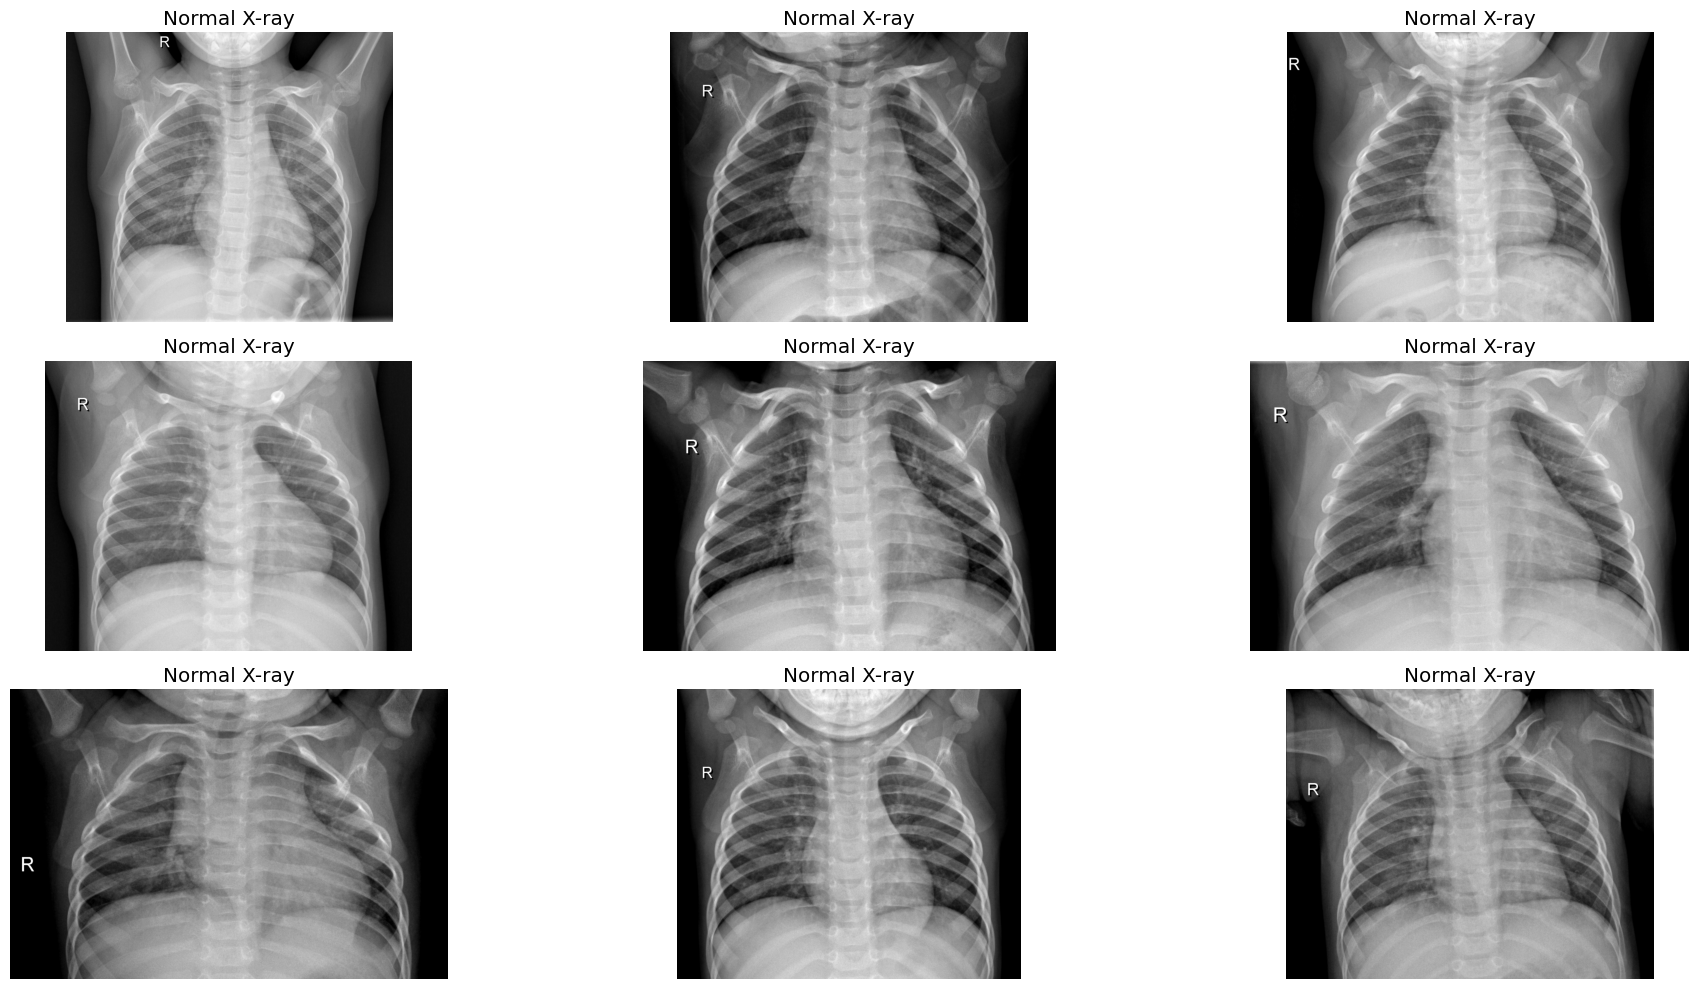

In [12]:
plt.figure(figsize=(20,10))

for i in range(9):
    plt.subplot(3,3, i+1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.title("Normal X-ray")
plt.tight_layout()

In [13]:
train_data.shape[0] # train data count  

5216

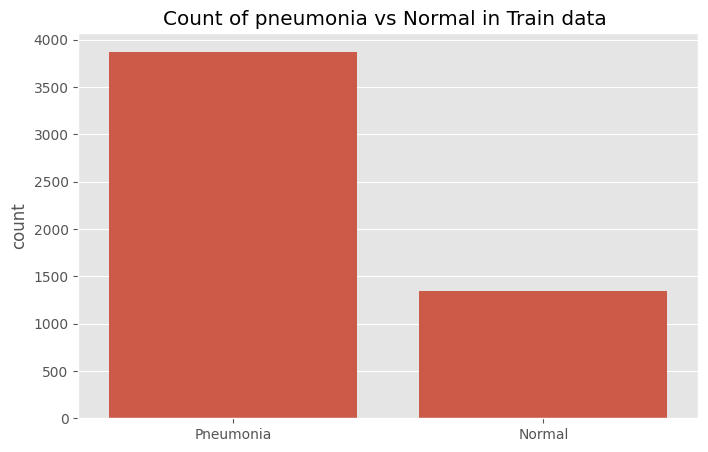

In [14]:
listx = []
for i in train_labels:
    if(i == 0):
        listx.append("Pneumonia")
    else:
        listx.append("Normal")
plt.figure(figsize=(8,5))        
sns.countplot(x=listx,legend=True)
plt.title("Count of pneumonia vs Normal in Train data ")
plt.show()

In [15]:
test_data.shape[0] # test_data  count 

624

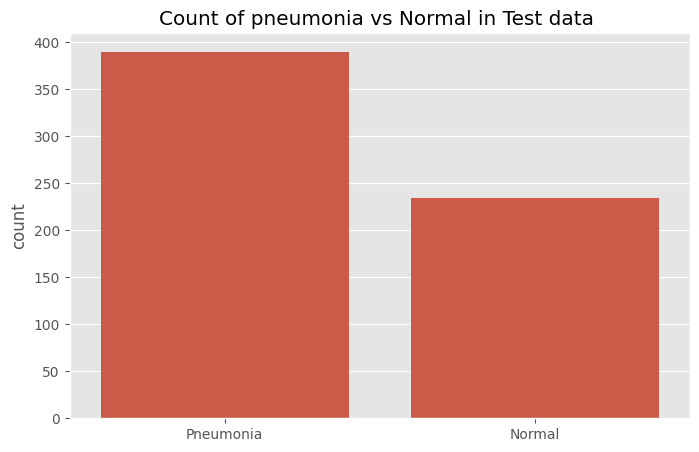

In [16]:
listx_test = []
for i in test_labels:
    if(i == 0):
        listx_test.append("Pneumonia")
    else:
        listx_test.append("Normal")
plt.figure(figsize=(8,5))        
sns.countplot(x=listx_test,legend=True)
plt.title("Count of pneumonia vs Normal in Test data ")
plt.show()

In [17]:
val_label.shape[0]

16

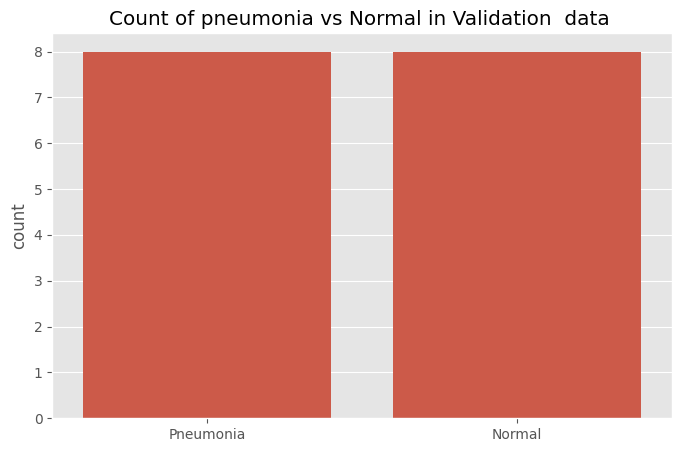

In [18]:
listx_val = []
for i in val_label:
    if(i == 0):
        listx_val.append("Pneumonia")
    else:
        listx_val.append("Normal")
plt.figure(figsize=(8,5))        
sns.countplot(x=listx_val,legend=True)
plt.title("Count of pneumonia vs Normal in Validation  data ")
plt.show()

## Model Building 

In [19]:
## model building
model_original = Sequential()

# إضافة الطبقات
model_original.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_original.add(MaxPooling2D(pool_size=(2, 2)))
model_original.add(Conv2D(64, (3, 3), activation='relu'))
model_original.add(MaxPooling2D(pool_size=(2, 2)))
model_original.add(Flatten())
model_original.add(Dense(128, activation='relu'))
model_original.add(Dropout(0.5))
model_original.add(Dense(1, activation='sigmoid'))  

C:\Users\fadys\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model_original.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=['accuracy'])

# Train model on train data 
history_original = model_original.fit(train_data,train_labels ,validation_data=(test_data,test_labels), epochs=10, batch_size=32)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 31s 180ms/step - accuracy: 0.8261 - loss: 34.8822 - val_accuracy: 0.7324 - val_loss: 1.1381
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.9335 - loss: 0.3415 - val_accuracy: 0.7115 - val_loss: 1.3080
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 31s 193ms/step - accuracy: 0.9537 - loss: 0.1234 - val_accuracy: 0.7035 - val_loss: 1.8476
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 31s 188ms/step - accuracy: 0.9644 - loss: 0.1004 - val_accuracy: 0.7468 - val_loss: 1.4900
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 172ms/step - accuracy: 0.9726 - loss: 0.0725 - val_accuracy: 0.7163 - val_loss: 1.8333
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.9814 - loss: 0.0522 - val_accuracy: 0.7372 - val_loss: 2.0316
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 27s 168ms/step - accuracy: 0.9850 - loss: 0.0363 - val_accuracy: 0.7308 - val_loss: 1.9675
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 28s 169ms/step - accuracy: 0.9883 - loss: 

## Summary of Results and Issues:

**Results**:
* Strong Performance on Training Data:

* Training accuracy improved from 0.9716 to 0.9918.
* Training loss decreased from 0.0994 to 0.0265.
* Poor Performance on Validation Data:

* Validation accuracy remained almost constant, between 0.7147 and 0.7404.
* Validation loss started at 3.5100 and increased significantly to 3.9207.
* 
**Issues** : 
1)  Overfitting:

* The model learns patterns in the training data very well but struggles to generalize to the validation data.
2)  tagnant or Declining Validation Accuracy:

* Validation accuracy did not improve over epochs, indicating that the model might have reached its capacity for the validation data.
3) Rising Validation Loss:

* Validation loss is very high and continues to increase, reflecting difficulty in handling validation data effectively.



In [22]:
from sklearn.utils.class_weight import compute_class_weight

In [23]:
# Step 1: Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Stop training when validation loss stops improving
    patience=3,          # Number of epochs to wait before stopping
    restore_best_weights=True
)

In [24]:
#Step 2: Calculate Class Weights
# Assuming `train_labels` contains the labels of the training data
classes = np.unique(train_labels)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=train_labels
)
class_weights_dict = dict(enumerate(class_weights))

In [25]:
class_weights_dict

{0: 0.6730322580645162, 1: 1.9448173005219984}

In [64]:
class_weights_dict2 = {0: 0.8, 1: 1.5}

In [63]:
print("Train Labels:", np.unique(train_labels, return_counts=True))
print("Class Weights Dictionary:", class_weights_dict)

Train Labels: (array([0, 1]), array([3875, 1341], dtype=int64))
Class Weights Dictionary: {0: 0.6730322580645162, 1: 1.9448173005219984}


## Data Augmentation 

In [26]:
# Step 3: Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,     # Rotate images up to 30 degrees
    width_shift_range=0.2, # Shift images horizontally by up to 20%
    height_shift_range=0.2, # Shift images vertically by up to 20%
    shear_range=0.2,       # Shear transformations
    zoom_range=0.2,        # Zoom in/out
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'    # Fill in missing pixels after transformations
)

In [27]:
# Reshape train_data to include channel dimension (for grayscale images)
train_data2 = np.expand_dims(train_data, axis=-1)

# Reshape val_data similarly
val_data2 = np.expand_dims(val_data, axis=-1)

#Reshape test_data 
test_data2=np.expand_dims(test_data, axis=-1)

In [28]:
print(f"Train data shape: {train_data2.shape}")
print(f" test data shape: {test_data2.shape}")
print(f"Validation data shape: {val_data2.shape}")

Train data shape: (5216, 128, 128, 1)
 test data shape: (624, 128, 128, 1)
Validation data shape: (16, 128, 128, 1)


In [29]:
# Train generator with augmentation
train_generator = train_datagen.flow(train_data2, train_labels, batch_size=32)

# Validation generator without augmentation
val_datagen = ImageDataGenerator(rescale=1.0/255.0)
val_generator = val_datagen.flow(test_data2,test_labels, batch_size=32) 


In [110]:
train_data2

array([[[[ 19],
         [ 27],
         [ 30],
         ...,
         [ 16],
         [  9],
         [  2]],

        [[ 24],
         [ 26],
         [ 34],
         ...,
         [ 17],
         [ 11],
         [  4]],

        [[ 22],
         [ 30],
         [ 39],
         ...,
         [ 19],
         [ 11],
         [  4]],

        ...,

        [[ 10],
         [  8],
         [  7],
         ...,
         [ 15],
         [ 15],
         [ 15]],

        [[ 10],
         [  8],
         [  7],
         ...,
         [ 15],
         [ 15],
         [ 15]],

        [[ 10],
         [ 10],
         [  7],
         ...,
         [ 15],
         [ 15],
         [ 15]]],


       [[[ 63],
         [ 75],
         [ 80],
         ...,
         [ 34],
         [ 25],
         [ 22]],

        [[ 77],
         [ 81],
         [ 87],
         ...,
         [ 37],
         [ 24],
         [ 22]],

        [[ 75],
         [ 83],
         [ 96],
         ...,
         [ 40],
         [

## Model 2 

In [140]:
# Define the model
model2 = Sequential()

# Add layers
model2.add(Input(shape=(128, 128, 1)))  # Input layer with the specified shape
model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))  # First Conv2D layer
model2.add(BatchNormalization()) 
model2.add(MaxPooling2D(pool_size=(2, 2)))  # First MaxPooling2D layer

model2.add(Conv2D(64, (3, 3), padding='same', activation='relu'))  # Second Conv2D layer
model2.add(BatchNormalization()) 
model2.add(MaxPooling2D(pool_size=(2, 2)))  # Second MaxPooling2D layer

model2.add(Flatten())  # Flattening layer
model2.add(Dense(128, activation='relu'))  # Fully connected layer
model2.add(BatchNormalization()) 
model2.add(Dropout(0.5))  # Dropout to prevent overfitting

# Add another Dense layer for better performance
model2.add(Dense(64, activation='relu'))  
model2.add(Dropout(0.5))  # Dropout to prevent overfitting

model2.add(Dense(1, activation='sigmoid'))  # Output layer 


In [141]:
# Compile Model with a custom learning rate
optimizer = Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer,
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [142]:
# Train the model with class weights
history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping],
    class_weight=class_weights_dict2  # class weights
)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 67s 397ms/step - accuracy: 0.6192 - loss: 0.7940 - val_accuracy: 0.6250 - val_loss: 1.3646
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 394ms/step - accuracy: 0.7765 - loss: 0.4981 - val_accuracy: 0.6250 - val_loss: 1.8542
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 397ms/step - accuracy: 0.8165 - loss: 0.4117 - val_accuracy: 0.6250 - val_loss: 1.4693
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 394ms/step - accuracy: 0.8334 - loss: 0.3735 - val_accuracy: 0.8173 - val_loss: 0.3826
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 395ms/step - accuracy: 0.8437 - loss: 0.3605 - val_accuracy: 0.8413 - val_loss: 0.4335
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 394ms/step - accuracy: 0.8604 - loss: 0.3164 - val_accuracy: 0.8638 - val_loss: 0.3650
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 64s 394ms/step - accuracy: 0.8557 - loss: 0.3517 - val_accuracy: 0.8349 - val_loss: 0.3767
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 65s 396ms/step - accuracy: 0.8742 - loss: 0

## Summarization of Model Performance

* **Training Accuracy:** Improved steadily from 61.92% in Epoch 1 to 89.00% in Epoch 10, showing consistent learning progress.

* **Training Loss:** Decreased from 0.7940 in Epoch 1 to 0.2822 in Epoch 10, indicating effective optimization during training.

* **Validation Accuracy:** Started at 62.50% in the initial epochs, surged to 81.73% by Epoch 4, and peaked at 87.98% in Epoch 8, stabilizing near this level by Epoch 10.

* **Validation Loss:** Began at a high value of 1.3646 in Epoch 1, improved significantly to 0.3205 by Epoch 8, and ended at 0.3369 in Epoch 10.

* **Insights:**  
  - The model shows substantial improvement in both training and validation metrics, particularly after Epoch 4.  
  - Early epochs highlight challenges with overfitting (e.g., high validation loss), but this stabilizes as training progresses.  
  - Final metrics suggest strong generalization and effective learning.

# Model Performance 

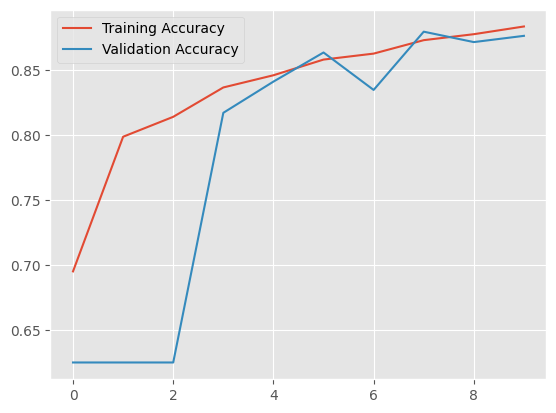

In [143]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [144]:
predictions = model2.predict(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step


In [145]:
predicted_classes = (predictions > 0.5).astype("int32")

In [135]:
from sklearn.metrics import classification_report 

In [146]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, predicted_classes)

In [147]:
cm

array([[337,  53],
       [ 73, 161]], dtype=int64)

<Axes: >

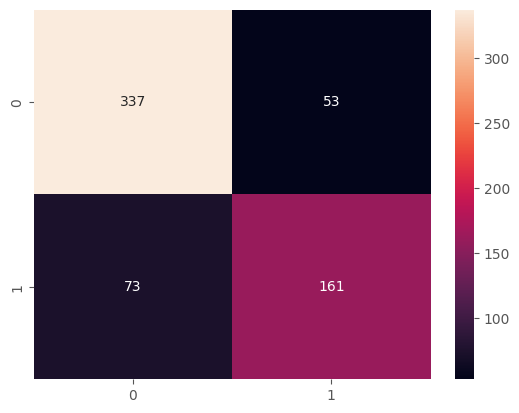

In [148]:
sns.heatmap(cm,annot=True,fmt='d')

In [149]:
print(classification_report(test_labels, predicted_classes))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       390
           1       0.75      0.69      0.72       234

    accuracy                           0.80       624
   macro avg       0.79      0.78      0.78       624
weighted avg       0.80      0.80      0.80       624



## Model 2 Saved 


In [136]:
os.getcwd()

'D:\\datasets\\pneumonia project\\extracted_data'

In [150]:
model2.save('model2.keras')